# Describe the data used and how you got the data

# Importing the necessary packages

In [73]:
# data analysis and wrangling

import pandas as pd # for data analytics
import numpy as np # for numerical computation

# visualization
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import string

# machine learning
# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler


# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix


# Reading the Dataset

In [74]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

#Combine train and test dataframe.This function make a dataframe from two dataframes.
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

all_data = concat_df(train_df,test_df)

#This function returns divided dataframe of train and test set. 
def divide_df(all_data):
  return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

#this list contain both train and test dataframe.This is just list of dataframe.
dfs_list = [train_df,test_df]

# Data Analysis

In [75]:
all_data.head(10) #all data previewing after combining both dataframes

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


# Data preview

In [76]:
# previewing the training dataset
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
# previewing the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [78]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [79]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,1601,G6,S
freq,1,577,7,4,644


# Missing Values

In [80]:

#This function show missing value in dataframe!
def missing_data(data):
  total = data.isnull().sum().sort_values(ascending=False)
  percent = (round(data.isnull().sum()/data.isnull().count()*100,1)).sort_values(ascending=False)  
  missing_df = pd.concat([total,percent], axis=1, keys = ['Total','percent'])
  missing_df = missing_df[missing_df['percent']>0]
  f,ax = plt.subplots(figsize=(8,6))
  plt.xticks(rotation = '90')
  fig=sns.barplot(missing_df.index,missing_df['percent'], color="blue",alpha=0.8)
  plt.xlabel('Features', fontsize=15)
  plt.ylabel('Percent of missing values', fontsize=15)
  plt.title('Percent missing data by feature', fontsize=15)
  return missing_df

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Total,percent
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


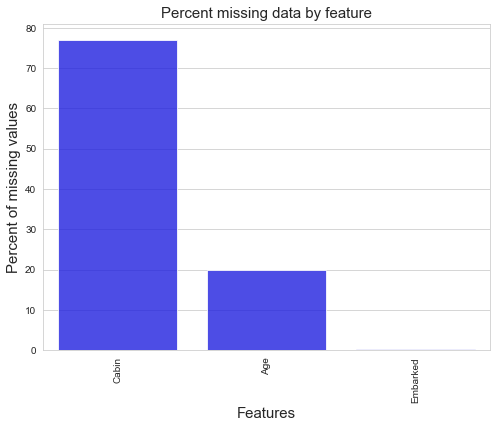

In [81]:
missing_data(train_df)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Total,percent
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2


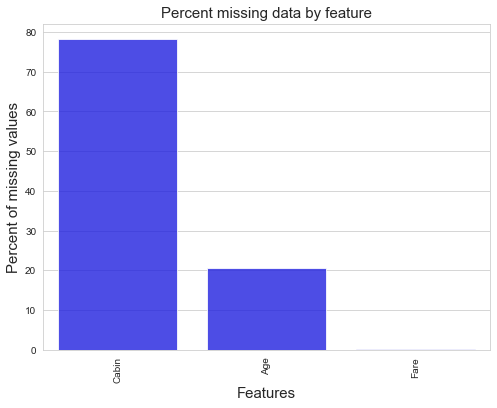

In [82]:
missing_data(test_df)

# Handling the Missing value

## Fare

In [83]:
all_data['Fare'].fillna(all_data['Fare'].median(), inplace = True)

## Embarked

In [84]:
all_data['Embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [85]:
all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace = True)

## Age

## Relation between (Pclass and Age) VS Survived

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


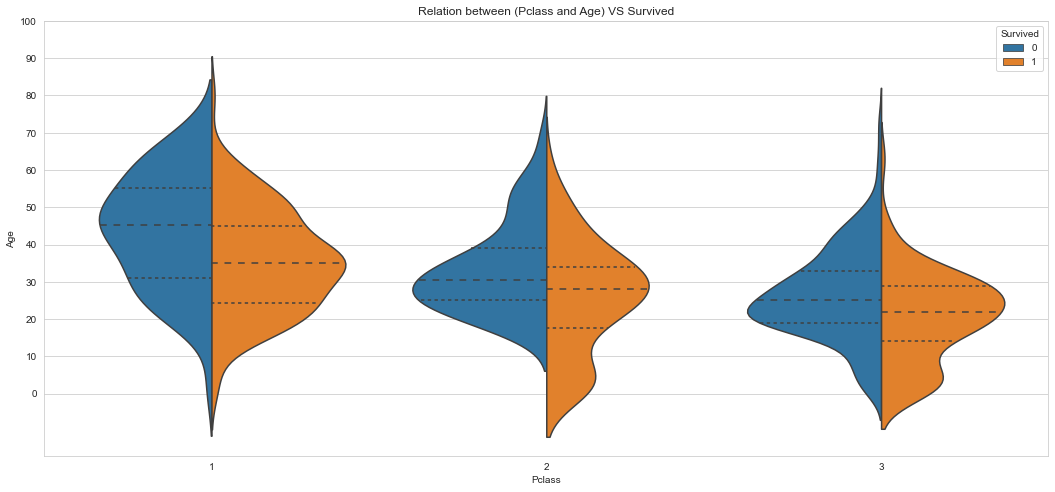

In [86]:
fig, ax = plt.subplots(figsize = (18,8))
sns.set_style("whitegrid")
sns.violinplot("Pclass","Age",hue="Survived",data=train_df, split =True, inner="quartile", ax=ax)
ax.set_title('Relation between (Pclass and Age) VS Survived')
ax.set_yticks(range(0,110,10))
plt.show()

# Finding correlation between age and others features

In [87]:
all_data_correlation = all_data.corr().abs().unstack().sort_values(ascending=False).reset_index()
all_data_correlation.rename(columns={'level_0':'Feature_1','level_1':'Feature_2',0:'Correlation'},inplace=True)
all_data_correlation[all_data_correlation['Feature_1']=='Pclass']

,Feature_1,Feature_2,Correlation
4,Pclass,Pclass,1.000000
8,Pclass,Fare,0.558683
10,Pclass,Age,0.408106
13,Pclass,Survived,0.338481
32,Pclass,SibSp,0.060832
35,Pclass,PassengerId,0.038354
43,Pclass,Parch,0.018322


## Relation between (Sex and Age) VS Survived

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


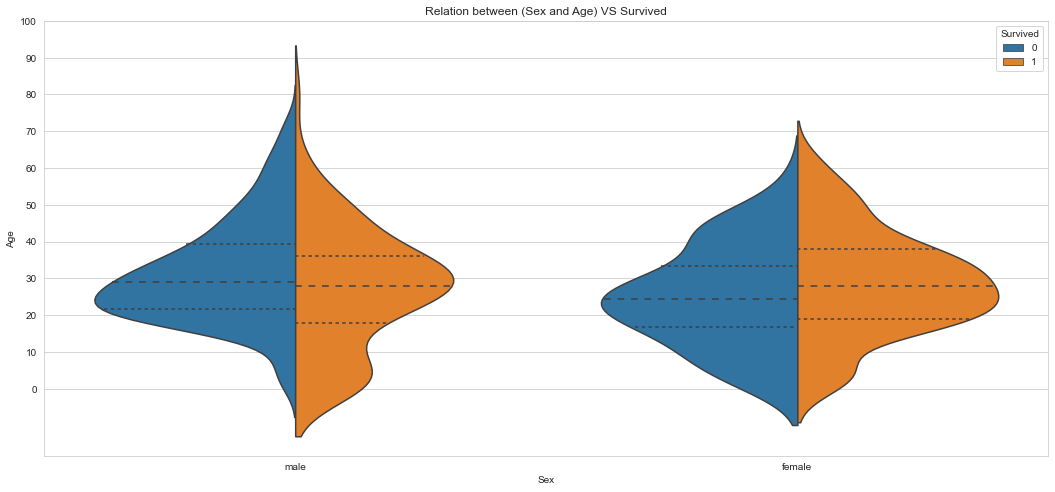

In [88]:
fig, ax = plt.subplots(figsize = (18,8))
sns.set_style("whitegrid")
sns.violinplot("Sex","Age",hue="Survived",data=train_df, split =True, inner="quartile", ax=ax)
ax.set_title('Relation between (Sex and Age) VS Survived')
ax.set_yticks(range(0,110,10))
plt.show()

### We will handle missing age value by group of sex and Pclass median. Because Age feature relatad with sex and Pclass. Another reason behine this, famale passanger tend to have slightly lower median age than male.So, median age depend on sex and pclass.

In [89]:
median_age_by_pclass_sex = all_data.groupby(['Sex','Pclass']).median()['Age']
for pclass in range(1,4):
  for sex in ['female','male']:
    print('Median of Pclass {} {}s: {}'.format(pclass,sex,median_age_by_pclass_sex[sex][pclass].astype(int)))

Median of Pclass 1 females: 36
Median of Pclass 1 males: 42
Median of Pclass 2 females: 28
Median of Pclass 2 males: 29
Median of Pclass 3 females: 22
Median of Pclass 3 males: 25


#### Filling the null Age values with the medians age by Sex and Pclass groups

In [90]:
all_data['Age'] = all_data.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

## Cabin

In [91]:
all_data['Deck'] = all_data['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'M')

all_data_deck = all_data.groupby(['Deck','Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 
                                                                        'Ticket']).rename(columns={'Name': 'Count'})
all_data_deck

Count
Deck Pclass       
A    1          22
B    1          65
C    1          94
D    1          40
     2           6
E    1          34
     2           4
     3           3
F    2          13
     3           8
G    3           5
M    1          67
     2         254
     3         693
T    1           1

In [92]:
# Passenger in the T deck is changed to A
idx = all_data[all_data['Deck'] == 'T'].index
all_data.loc[idx, 'Deck'] = 'A'

In [93]:
all_data['Deck'] = all_data['Deck'].replace(['A','B','C'],'ABC')
all_data['Deck'] = all_data['Deck'].replace(['D','E'],'DE')
all_data['Deck'] = all_data['Deck'].replace(['F','G'],'FG')

all_data['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

#### We dont need Cabin feature so we will drop it

In [94]:
all_data.drop(['Cabin'], inplace =True, axis = 1)

train_df , test_df = divide_df(all_data)
dfs_list = [train_df,test_df]

for df in dfs_list:
  print(train_df.isnull().sum())
  print('-'*30)

Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
Deck           0
dtype: int64
------------------------------
Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
Deck           0
dtype: int64
------------------------------


# Data Visualization

### Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

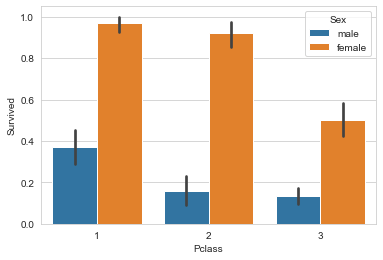

In [95]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=train_df)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


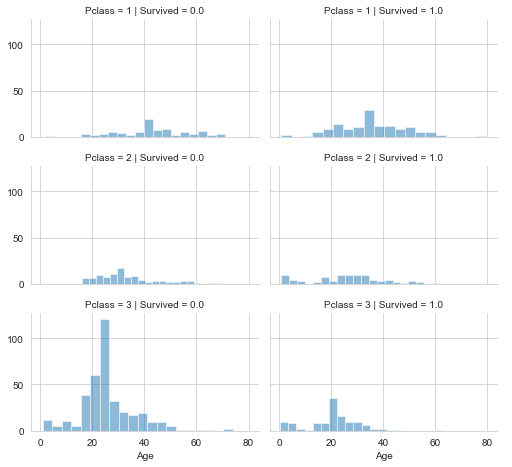

In [96]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass',size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

## Family Size

In [97]:
data1 = train_df.copy()
data1['FamilySize'] = data1['SibSp'] + data1['Parch'] + 1
data1['FamilySize'].value_counts().sort_values(ascending=False)

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


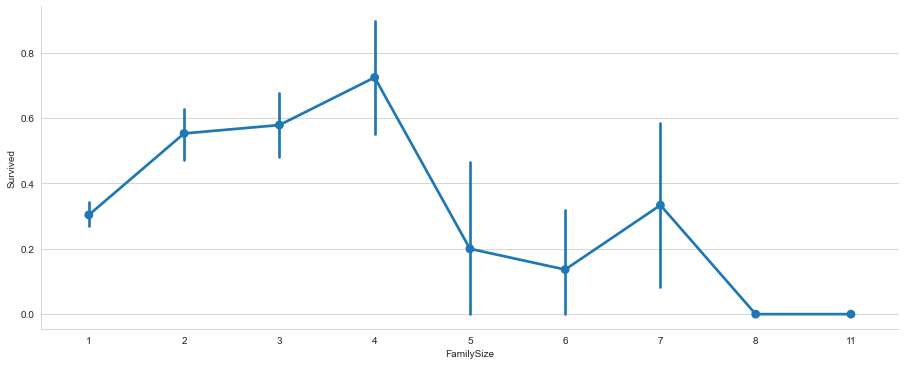

In [98]:
axes = sns.factorplot('FamilySize','Survived', data=data1, aspect = 2.5, )

## Embarked, Pclass and Sex

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


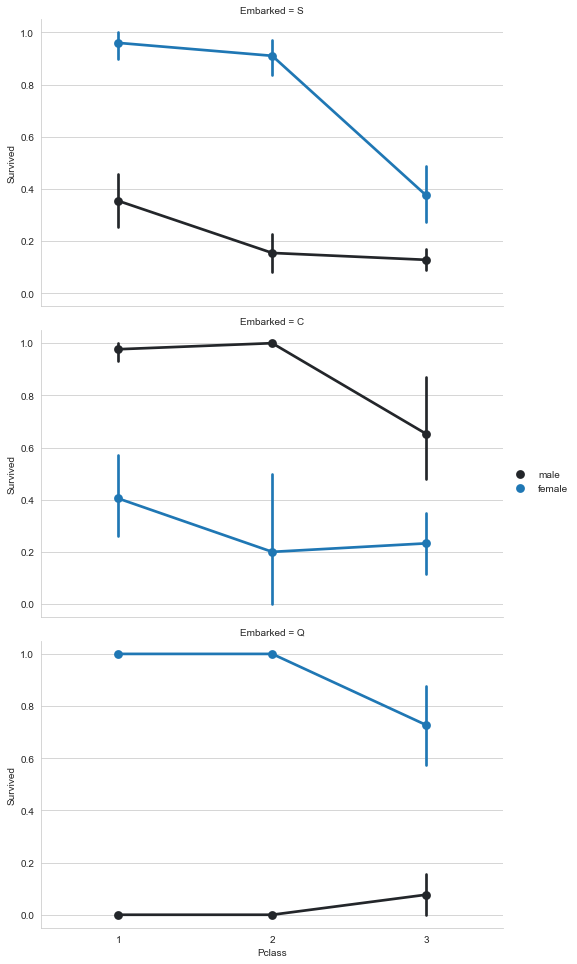

In [99]:
FaceGrid = sns.FacetGrid(train_df, row='Embarked', size = 4.5, aspect=1.6)
FaceGrid.map(sns.pointplot,'Pclass','Survived','Sex', palette =None, oder=None, hue_oder=None)

FaceGrid.add_legend()

## Visualizing Embarked, Parch, Pclass, Sex, SibSp, Deck against Survived Feature

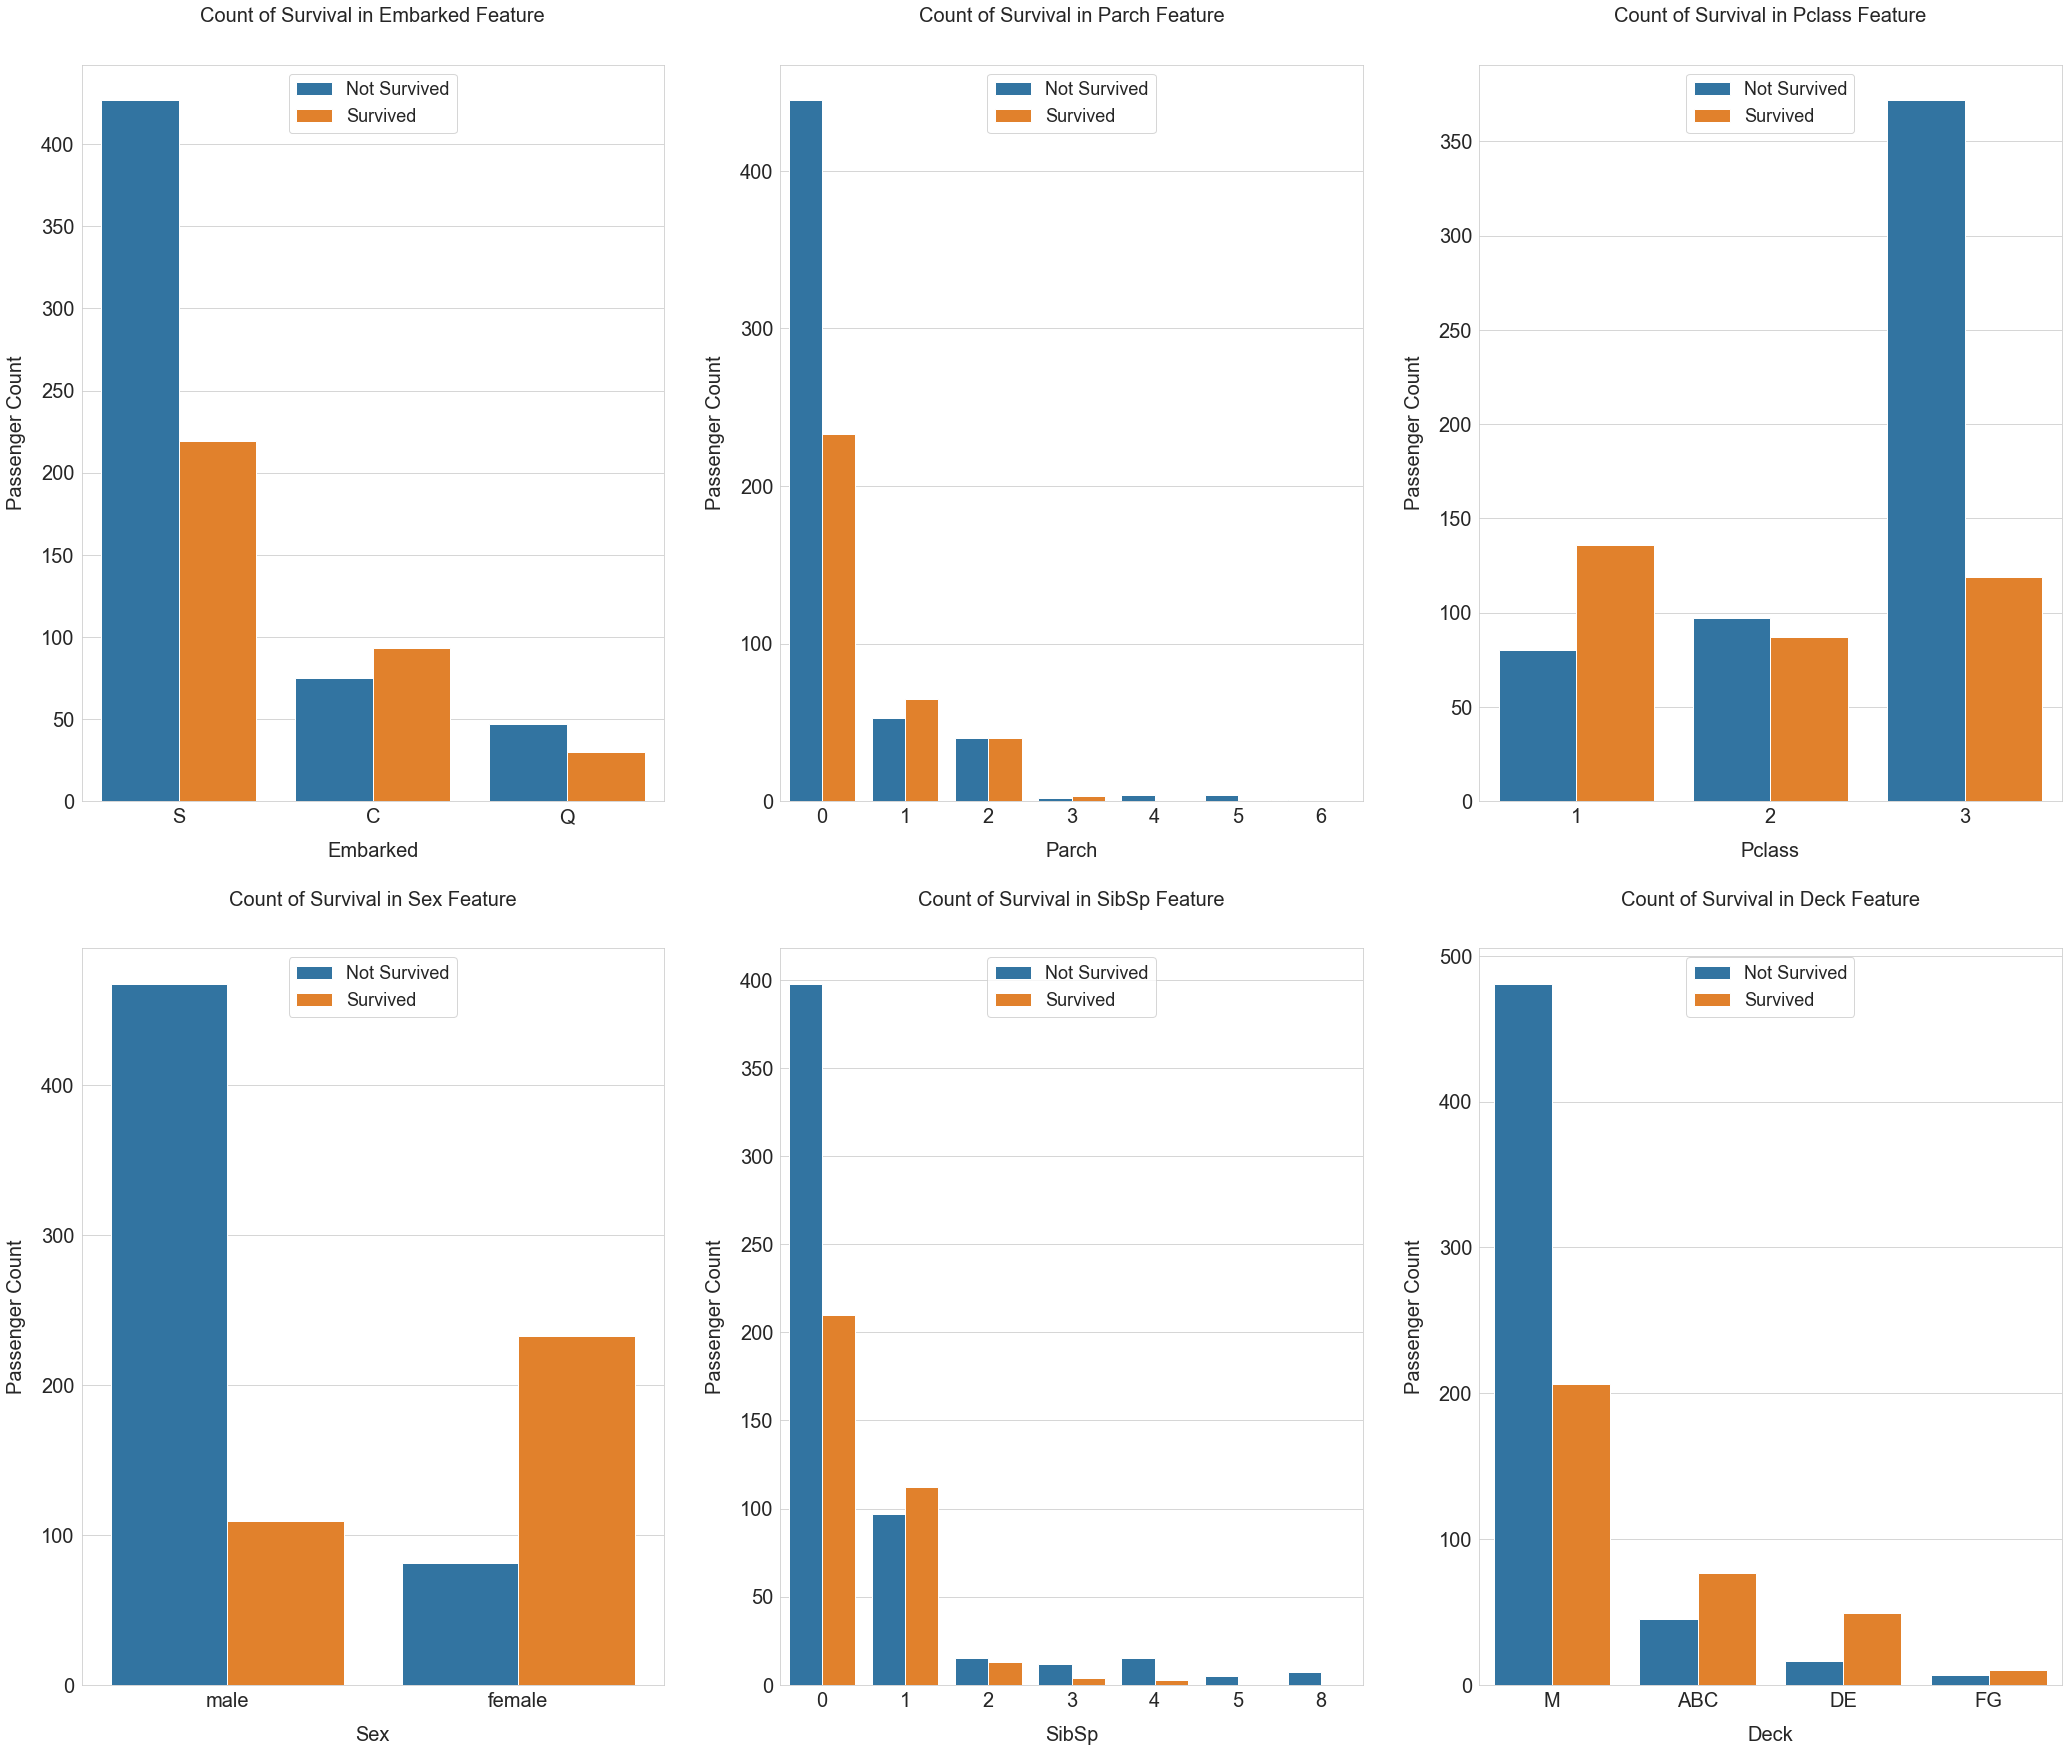

In [100]:
cate_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Deck']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cate_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=train_df)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

### Concat train and test set, keet it all_data DF

In [101]:
all_data = concat_df(train_df,test_df)
all_data.head()

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,M,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,ABC,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,M,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,ABC,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,M,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


# Correlation Between all The Features

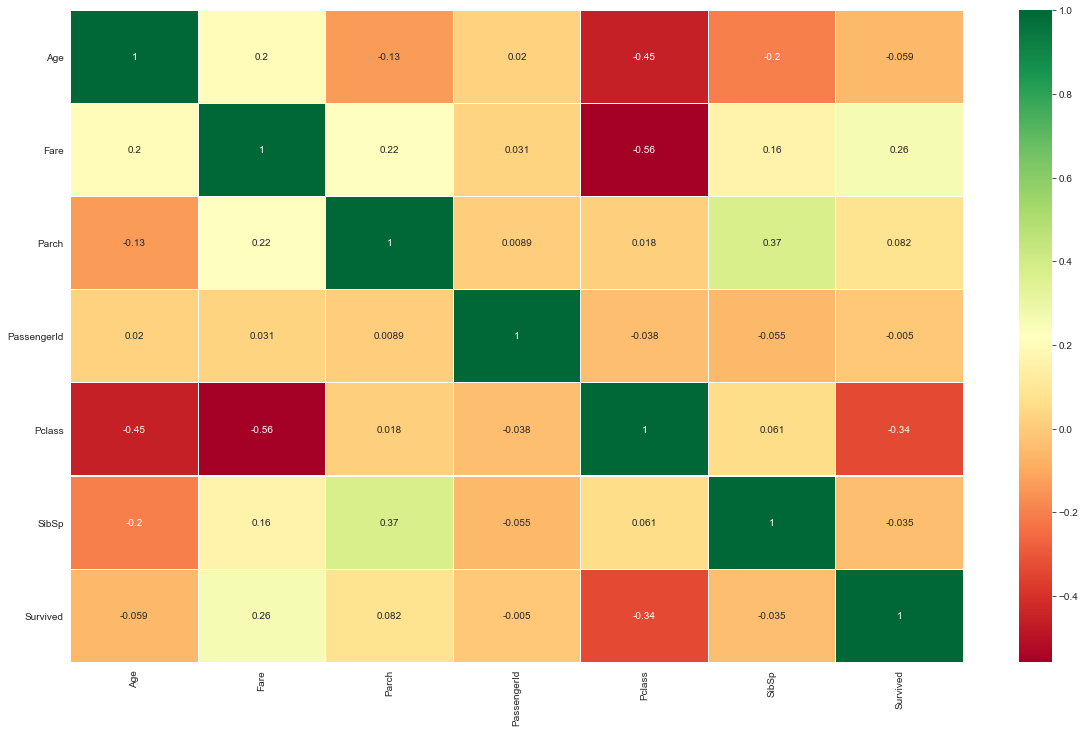

In [102]:
sns.heatmap(all_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

# Feature engineering

###  Age

In [103]:
all_data['Age'] = pd.qcut(all_data['Age'], 10)

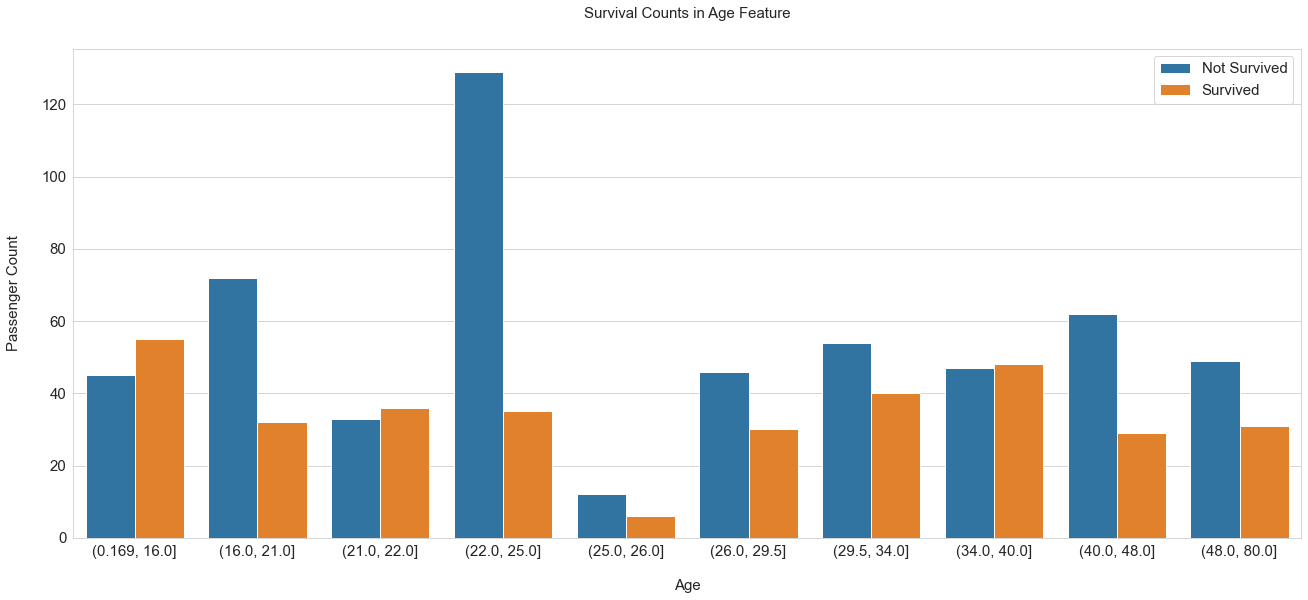

In [104]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=all_data)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

### Fare

In [105]:
all_data['Fare'] = pd.qcut(all_data['Fare'], 13)

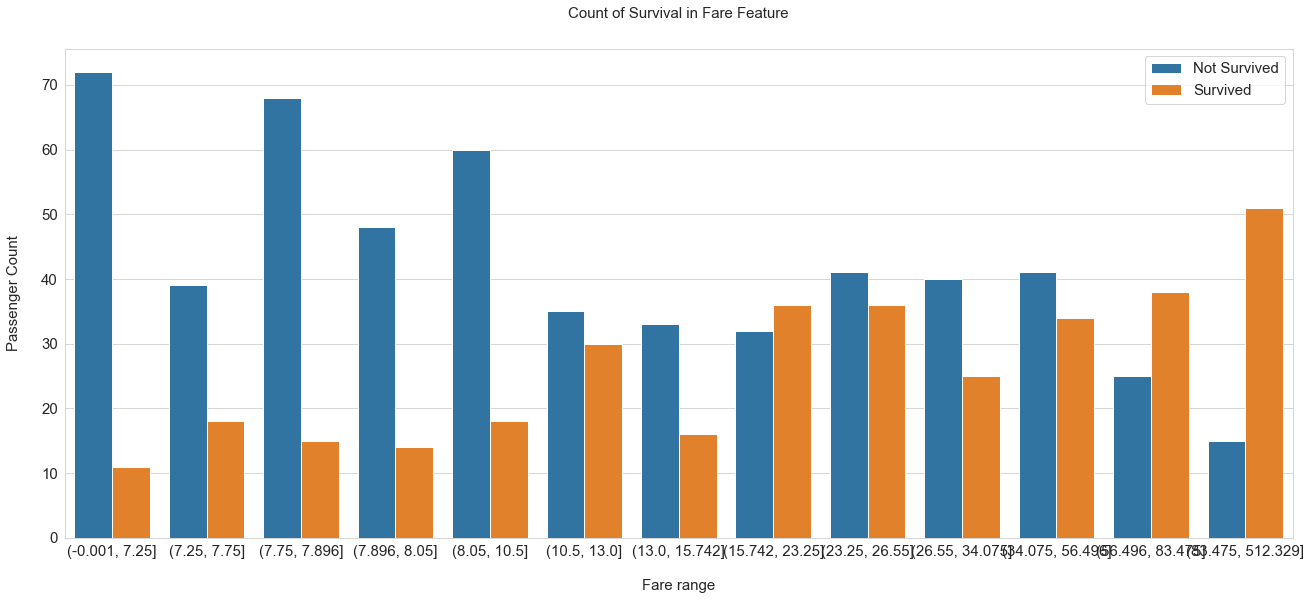

In [106]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=all_data)

plt.xlabel('Fare range', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

### Ticket

In [107]:
all_data['Ticket_Frequency'] = all_data.groupby('Ticket')['Ticket'].transform('count')

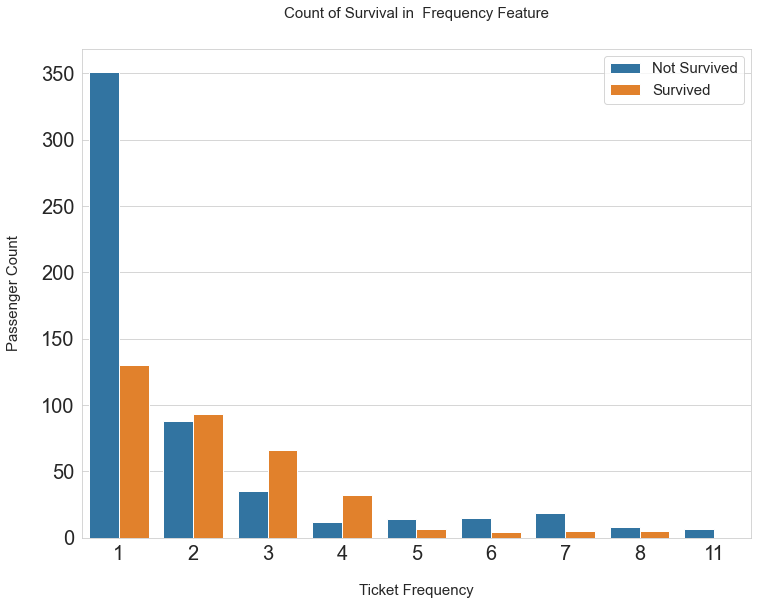

In [108]:
fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=all_data)
plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format(' Frequency'), size=15, y=1.05)

plt.show()

## Family Size

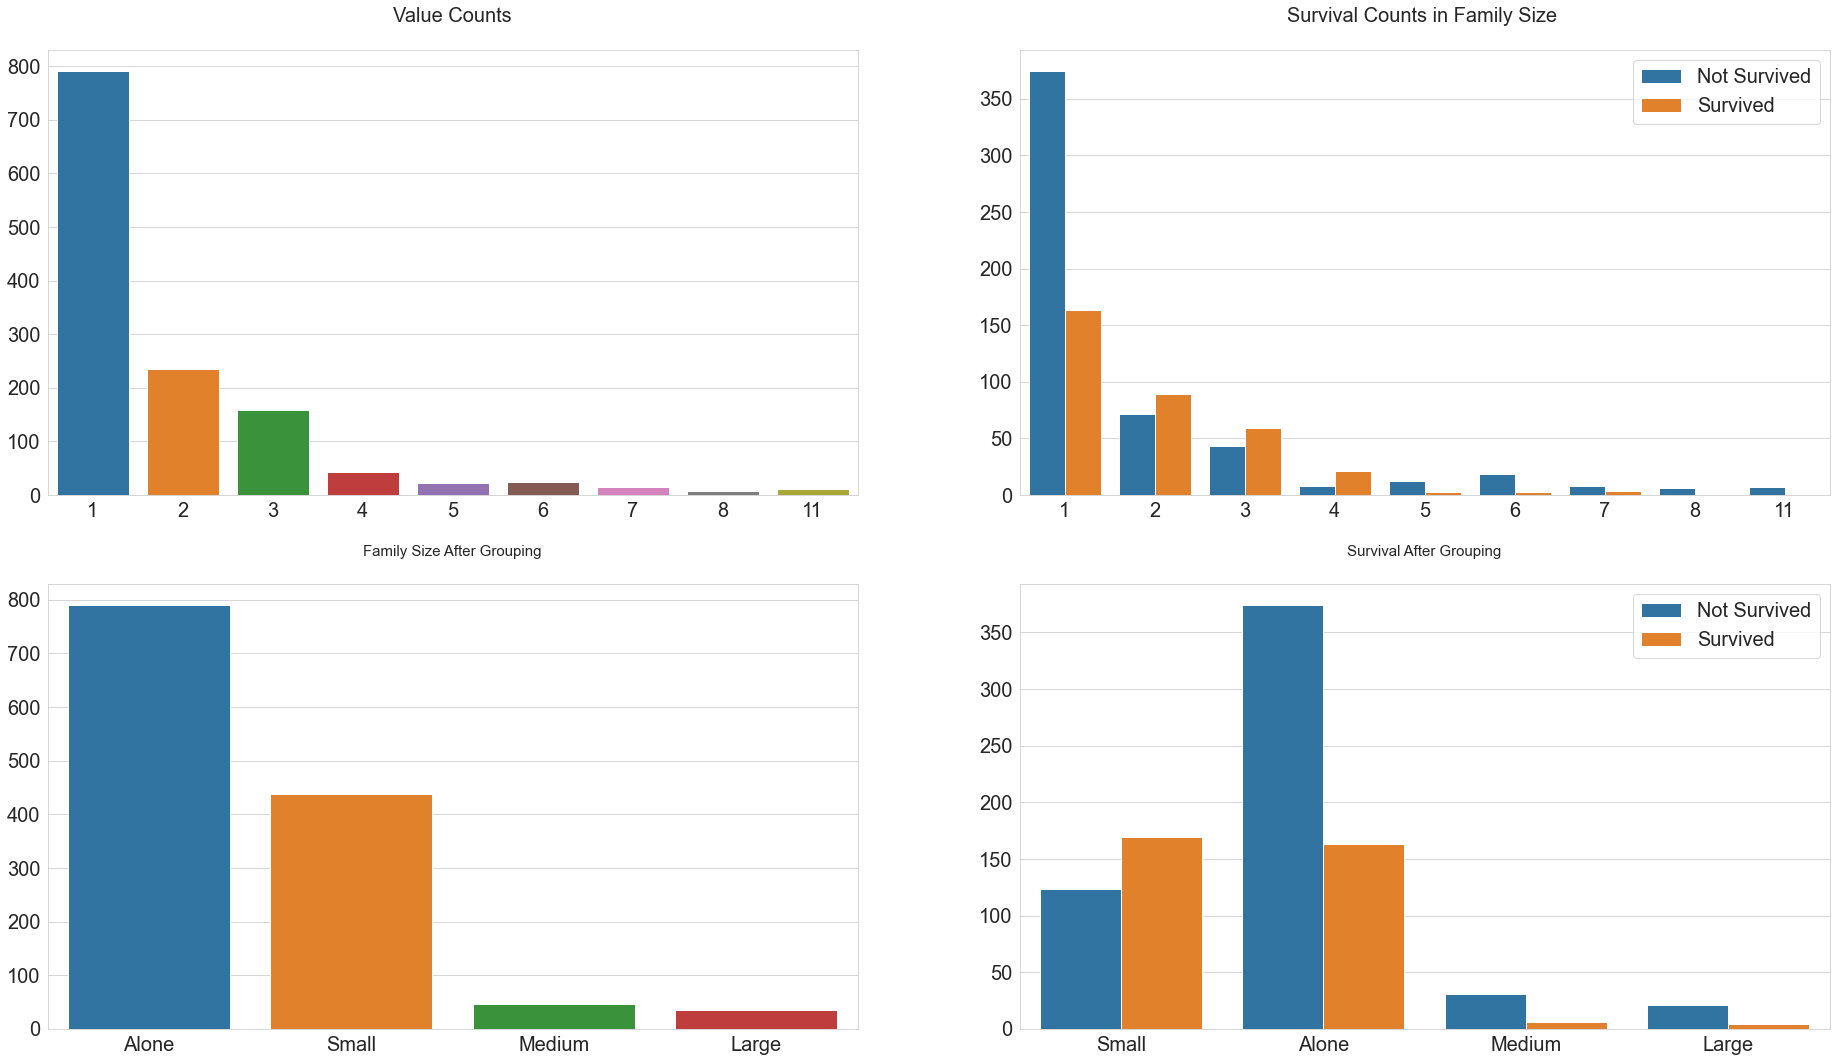

In [109]:
all_data['Family_Size'] = all_data['SibSp'] + all_data['Parch'] + 1

fig, axs = plt.subplots(figsize=(18, 18), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=all_data['Family_Size'].value_counts().index, y=all_data['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=all_data, ax=axs[0][1])
axs[0][0].set_title('Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_view = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
all_data['Family_Size_Grouped'] = all_data['Family_Size'].map(family_view)

sns.barplot(x=all_data['Family_Size_Grouped'].value_counts().index, y=all_data['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=all_data, ax=axs[1][1])

axs[1][0].set_title('Family Size After Grouping', size=15, y=1.05)
axs[1][1].set_title('Survival After Grouping', size=15, y=1.05)
for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')
plt.show()

# Title

In [110]:
all_data['Title'] = all_data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

all_data['Is_Married'] = 0
all_data['Is_Married'].loc[all_data['Title'] == 'Mrs'] = 1

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


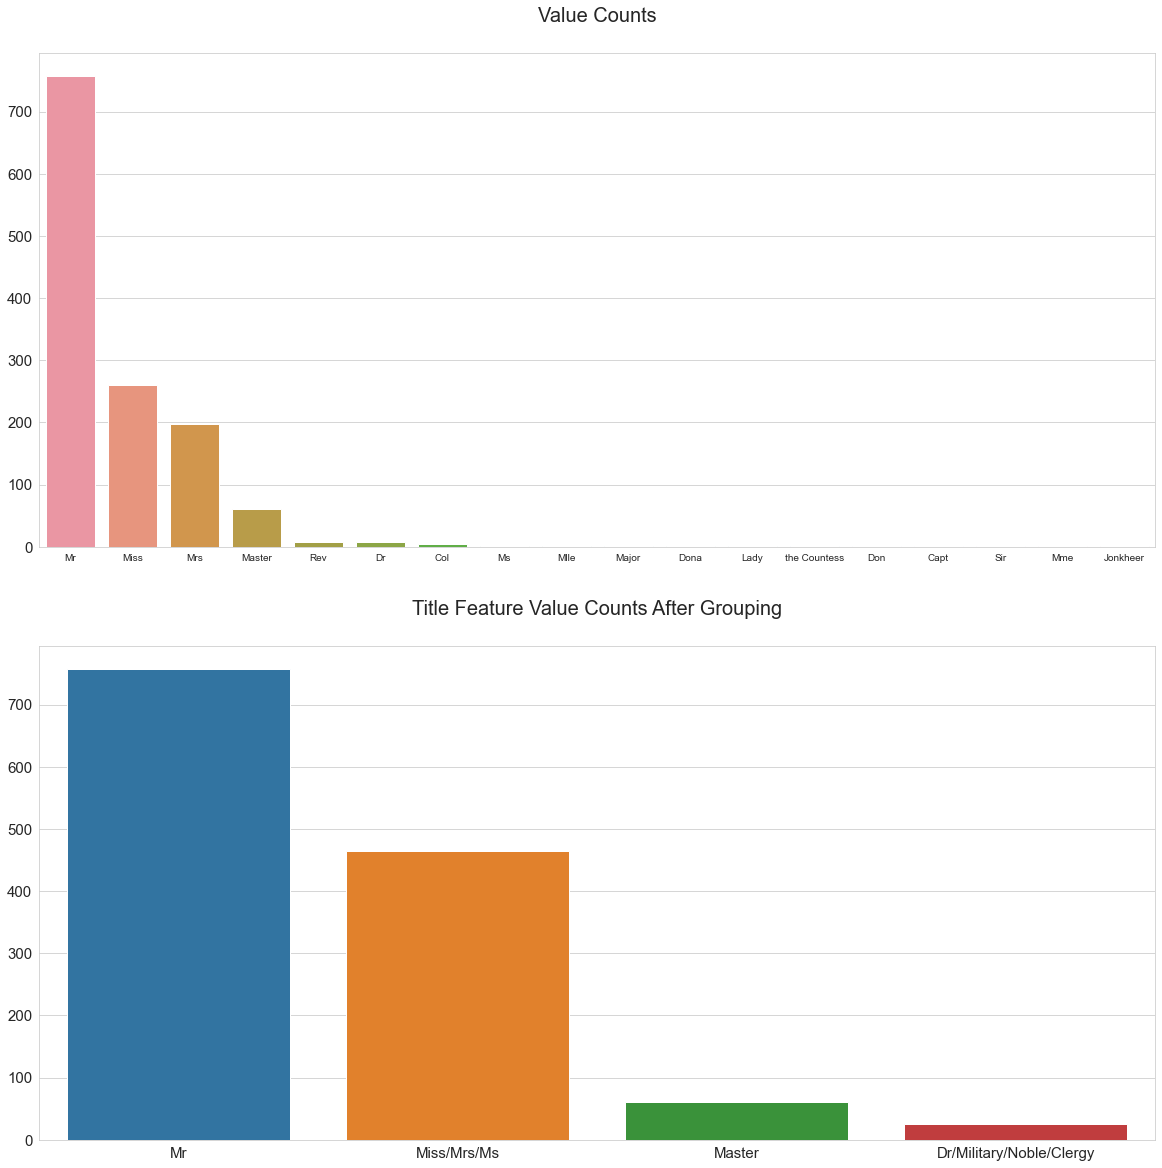

In [111]:

fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=all_data['Title'].value_counts().index, y=all_data['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Value Counts', size=20, y=1.05)

all_data['Title'] = all_data['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
all_data['Title'] = all_data['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=all_data['Title'].value_counts().index, y=all_data['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

# Family Survival Rate

In [112]:
def extract_surname(data):    
    
    families = []
    
    for i in range(len(data)):  
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

all_data['Family'] = extract_surname(all_data['Name'])

In [113]:
train_df , test_df = divide_df(all_data)
dfs_list = [train_df,test_df]

In [114]:
non_unique_families = [x for x in train_df['Family'].unique() if x in test_df['Family'].unique()]
non_unique_tickets = [x for x in train_df['Ticket'].unique() if x in test_df['Ticket'].unique()]

df_family_survival_rate = train_df.groupby('Family')['Survived', 'Family','Family_Size'].median()
df_ticket_survival_rate = train_df.groupby('Ticket')['Survived', 'Ticket','Ticket_Frequency'].median()

family_rates = {}
ticket_rates = {}

for i in range(len(df_family_survival_rate)):
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

for i in range(len(df_ticket_survival_rate)):
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]

<ipython-input-114-eebff7cdea18>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_family_survival_rate = train_df.groupby('Family')['Survived', 'Family','Family_Size'].median()
<ipython-input-114-eebff7cdea18>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ticket_survival_rate = train_df.groupby('Ticket')['Survived', 'Ticket','Ticket_Frequency'].median()


#### Creating a list of families and tickets that are occuring in both training and test set then Checking a family exists in both training and test set, and has members more than 1, after that checking ticket who had more than one ticket.

In [115]:
mean_survival_rate = np.mean( train_df['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len( train_df)):
    if  train_df['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[ train_df['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(test_df)):
    if test_df['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[test_df['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
train_df['Family_Survival_Rate'] = train_family_survival_rate
train_df['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
test_df['Family_Survival_Rate'] = test_family_survival_rate
test_df['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

<ipython-input-115-d8b77d2a15da>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Family_Survival_Rate'] = train_family_survival_rate
<ipython-input-115-d8b77d2a15da>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Family_Survival_Rate_NA'] = train_family_survival_rate_NA


In [116]:
train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(train_df)):
    if train_df['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[train_df['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)
        
for i in range(len(test_df)):
    if test_df['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[test_df['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
        
train_df['Ticket_Survival_Rate'] = train_ticket_survival_rate
train_df['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
test_df['Ticket_Survival_Rate'] = test_ticket_survival_rate
test_df['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

<ipython-input-116-9314764c52a3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Ticket_Survival_Rate'] = train_ticket_survival_rate
<ipython-input-116-9314764c52a3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA


#### Ticket Survival Rate and Family Survival Rate

In [117]:
for df in dfs_list:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2

<ipython-input-117-db569144e50d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
<ipython-input-117-db569144e50d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2


# Feature Tranformation

### Label Encoding

In [118]:
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs_list:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])

<ipython-input-118-e5bf0157dba1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = LabelEncoder().fit_transform(df[feature])
<ipython-input-118-e5bf0157dba1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = LabelEncoder().fit_transform(df[feature])


In [119]:
onehoten_features = ['Sex','Pclass',  'Deck', 'Embarked', 'Family_Size_Grouped', 'Title']
encoded_features = []

for df in dfs_list:
    for feature in onehoten_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)       
train_df = pd.concat([train_df, *encoded_features[:6]], axis=1)
test_df = pd.concat([test_df, *encoded_features[6:]], axis=1)

# Dropping Un-needed feature

In [120]:
all_data = concat_df(train_df, test_df )
drop_cols = ['Deck', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Grouped', 'Survived',
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']
all_data.drop(columns=drop_cols, inplace=True)

In [121]:
test_drop_cols = ['Deck', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Grouped',
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']

# Correlation Between The Features

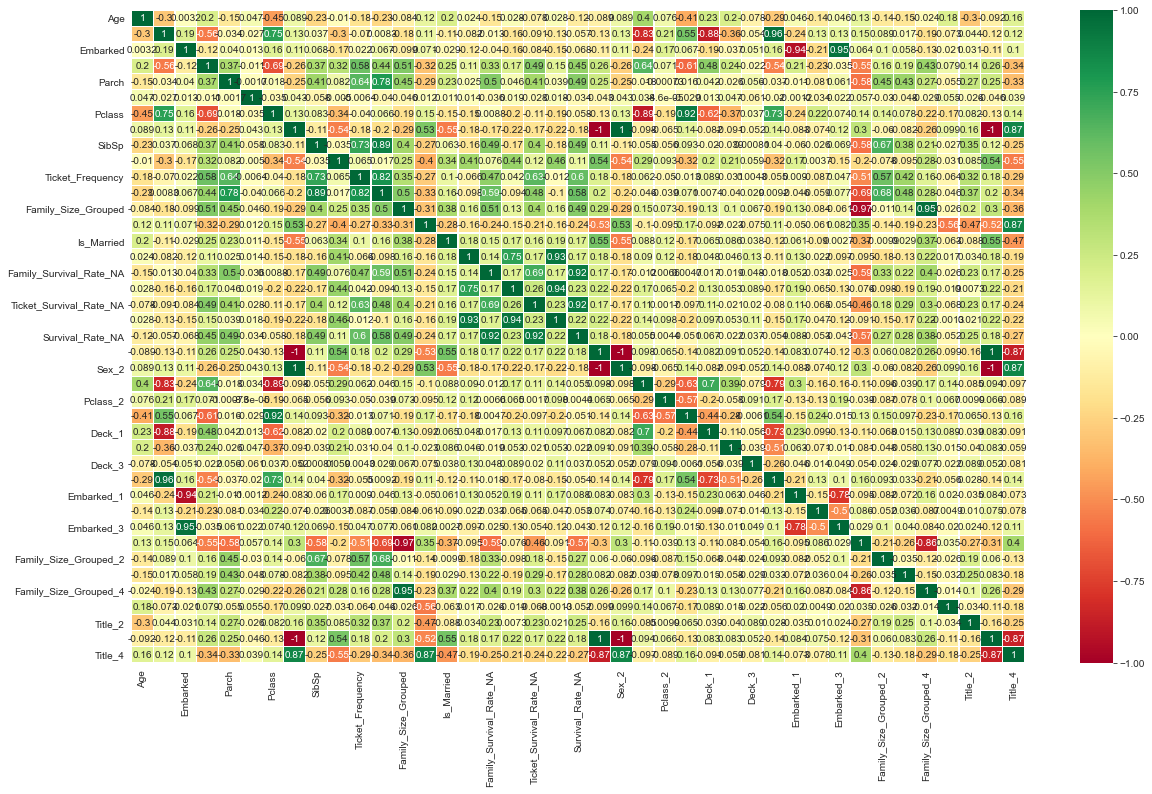

In [122]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

# Machine Learning Models

In [123]:
X = train_df.drop(columns=drop_cols)

In [125]:
all_features = StandardScaler().fit_transform(X)
Targeted_feature= train_df['Survived'].values
test_X = StandardScaler().fit_transform(test_df.drop(columns=test_drop_cols))

print('X_train shape: {}'.format(all_features.shape))
print('Y_train shape: {}'.format(Targeted_feature.shape))
print('X_test shape: {}'.format(test_X.shape))

X_train shape: (891, 26)
Y_train shape: (891,)
X_test shape: (418, 26)


In [126]:
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 26), (268, 26), (623,), (268,))

## This function show accuracy of model and confustion matrics

In [127]:
def model_accuracy(model,all_feature,Targeted_feature):
  X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
  
  #Model Acuuracy 
  print('The accuracy of the Model is',round(model.score(X_train, y_train)*100,2), "%")

  kfold = KFold(n_splits=10, random_state=22)
  cross_scores=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
  print('Cross validation [Mean] :',round(cross_scores.mean()*100,2),'%')
  print('Cross validation [Scores] :',cross_scores)
  print('Cross validation [Standard Deviation] :',cross_scores.std())

  y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
  sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
  plt.title('Confusion matrix', y=1.05, size=15)

### This is binary classification problem. So here I use these algorithm to find best accuracy model

<ol>
    <li> Random Forrest</li>
    <li> Decision Tree</li>
    <li> Support Vector Machines</li>
    <li> Logistic Regression</li>
</ol>

#### Random forest

--------------The Accuracy of the Random Forest model----------------------------
The accuracy of the Model is 95.83 %


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Cross validation [Mean] : 82.94 %
Cross validation [Scores] : [0.81111111 0.83146067 0.76404494 0.86516854 0.82022472 0.85393258
 0.83146067 0.7752809  0.87640449 0.86516854]
Cross validation [Standard Deviation] : 0.036051855495942295


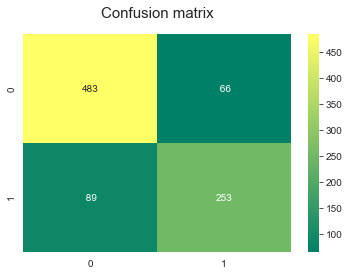

In [128]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)
print('--------------The Accuracy of the Random Forest model----------------------------')
model_accuracy(random_forest,all_features,Targeted_feature)

#### Decision tree

--------------The Accuracy of the Decisionc tree model----------------------------
The accuracy of the Model is 95.83 %
Cross validation [Mean] : 80.93 %
Cross validation [Scores] : [0.76666667 0.83146067 0.74157303 0.84269663 0.83146067 0.75280899
 0.83146067 0.78651685 0.87640449 0.83146067]
Cross validation [Standard Deviation] : 0.042068462085645575


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


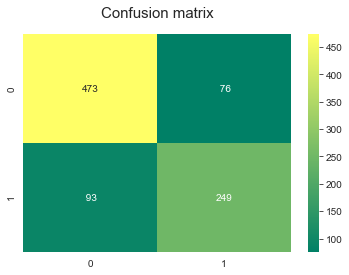

In [129]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
print('--------------The Accuracy of the Decisionc tree model----------------------------')
model_accuracy(decision_tree,all_features,Targeted_feature)

#### Support Vector Machines 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarnin

--------------The Accuracy of the Support Vector Machine model----------------------------
The accuracy of the Model is 86.36 %


C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Cross validation [Mean] : 84.85 %
Cross validation [Scores] : [0.85555556 0.88764045 0.78651685 0.88764045 0.83146067 0.79775281
 0.82022472 0.83146067 0.91011236 0.87640449]
Cross validation [Standard Deviation] : 0.03935203336886336


C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

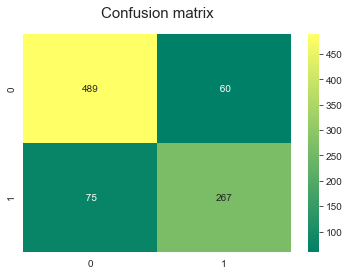

In [130]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
print('--------------The Accuracy of the Support Vector Machine model----------------------------')
model_accuracy(linear_svc,all_features,Targeted_feature)

####  Logistic Regression

--------------The Accuracy of the LogisticRegression model----------------------------
The accuracy of the Model is 87.48 %
Cross validation [Mean] : 85.07 %
Cross validation [Scores] : [0.85555556 0.8988764  0.78651685 0.88764045 0.83146067 0.79775281
 0.82022472 0.82022472 0.92134831 0.88764045]
Cross validation [Standard Deviation] : 0.043835411434131666


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


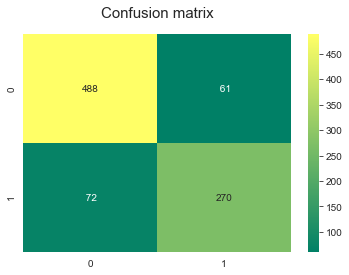

In [131]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print('--------------The Accuracy of the LogisticRegression model----------------------------')
model_accuracy(logreg,all_features,Targeted_feature)

# Model Selection

#### Random Forest

####  Feature Importance

In [132]:
importance = pd.DataFrame({
    'feature': X.columns,
    'importance' :np.round(random_forest.feature_importances_,3)
})

importance = importance.sort_values('importance', ascending=False).set_index('feature')

importance.head(26)

,importance
feature,
Age,0.139
Fare,0.121
Survival_Rate,0.110
Title_4,0.081
Title_3,0.080
Sex_1,0.069
Sex_2,0.059
Ticket_Frequency,0.056
Pclass_3,0.047


<AxesSubplot:xlabel='feature'>

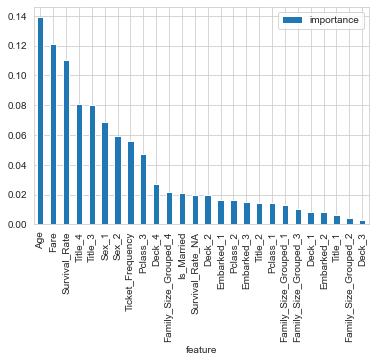

In [133]:
importance.plot.bar()

# Hyperparameter Tuning

In [137]:
 from sklearn.model_selection import GridSearchCV
 param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10], "n_estimators": [100, 500, 1000,11000, 1500]}


 clf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=param_grid,verbose=True)

 clf.fit(all_features, Targeted_feature)

 print(clf.best_score_) 
 print(clf.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8484527022785763
RandomForestClassifier(min_samples_leaf=5, random_state=42)


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 23.7min finished


# Apply the Estimator which got from parameter tuning of Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=42,
                                           n_jobs=-1,
                                           verbose=1)
random_forest.fit(all_features,Targeted_feature)
Y_prediction = (random_forest.predict(test_X)).astype(int)
random_forest.score(all_features,Targeted_feature)
acc_random_forest = round(random_forest.score(all_features,Targeted_feature) * 100, 2)


print(acc_random_forest)
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    0.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 1100 out of 1100 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elaps

85.63
oob score: 84.74000000000001 %


[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 1100 out of 1100 | elapsed:    0.1s finished


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s


--------------The Accuracy of the Final model----------------------------
The accuracy of the Model is 85.23 %


[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 1100 out of 1100 | elapsed:    0.1s finished
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 766 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    5.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks    

Cross validation [Mean] : 85.07 %
Cross validation [Scores] : [0.86666667 0.91011236 0.7752809  0.87640449 0.86516854 0.80898876
 0.84269663 0.79775281 0.88764045 0.87640449]
Cross validation [Standard Deviation] : 0.04120129374265155


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 856 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 1100 out of 1100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 856 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBac

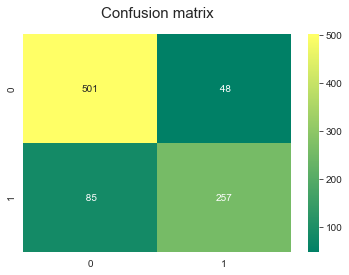

In [139]:
print('--------------The Accuracy of the Final model----------------------------')
model_accuracy(random_forest,all_features,Targeted_feature)

##### As we can see our Cross Validation Score is 85.07 % after tuning. So it is improved! So, This is our final model

In [149]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": Y_prediction
})
submission.to_csv('submission.csv', index=False)